In [1]:
import os 
import torch 
import librosa 
import seaborn as sns
import matplotlib.pyplot as plt 
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

In [9]:
wav_path_kid = '/home/cogsci-lasrlab/Documents/FANN/K1_wav_kid'
wav_path_adult = '/home/cogsci-lasrlab/Documents/FANN/K1_wav_adult'

base_model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
base_proc = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

large_model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")
large_proc = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")

XLSR_53_model = Wav2Vec2ForCTC.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-english")
XLSR_53_proc = Wav2Vec2Processor.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-english")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
def load_audio(file_path):
    audio, _ = librosa.load(file_path, sr=16000)
    return audio

In [4]:
def transcribe_audio(model, proc, audio):
    input_vals = proc(
        audio, 
        return_tensors = 'pt',
        sampling_rate = 16000
    ).input_values 
    
    with torch.no_grad():
        logits = model(input_vals).logits 
        
    predicted_ids = torch.argmax(logits, dim = -1)
    predicted_word = proc.decode(predicted_ids[0])
    
    return predicted_word.lower()

In [5]:
def check_accuracy(target, prediction):
    return target.lower() == prediction.lower()

In [6]:
def extract_target_word(filename):
    parts = filename.split('_')
    target_part = parts[-1]
    target_word = target_part.split('.')[0]
    
    return target_word

In [14]:
base_correct = 0 
large_correct = 0 
XLSR_53_correct = 0
total_words = 0 

for file_name in os.listdir(wav_path_kid):
    if file_name.endswith('.wav'):
        file_path = os.path.join(wav_path_kid, file_name)
        
        try:
            audio = load_audio(file_path)
            target = extract_target_word(file_name)
            #print(target)
            
            base_pred = transcribe_audio(base_model, base_proc, audio)
            #print(base_pred)
            base_correct += check_accuracy(target, base_pred)
            
            large_pred = transcribe_audio(large_model, large_proc, audio)
            #print(large_pred)
            large_correct += check_accuracy(target, large_pred)
            
            XLSR_53_pred = transcribe_audio(XLSR_53_model, XLSR_53_proc, audio)
            XLSR_53_correct += check_accuracy(target, XLSR_53_pred)
            
            total_words += 1 
            
        except Exception as e:
            print(f'Error processing file {file_name}: {e}')

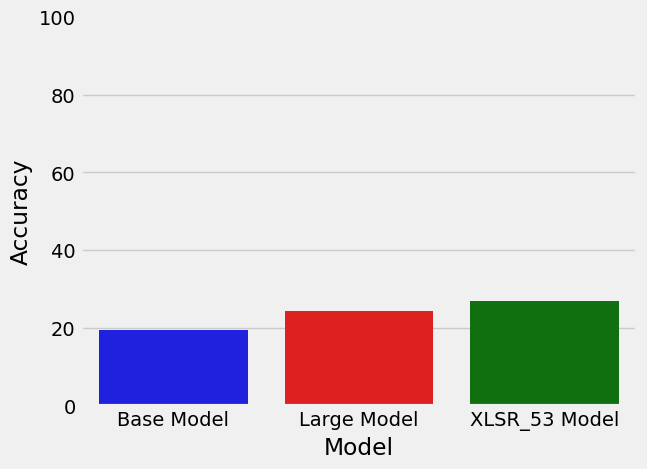

Base Model Accuracy: 19.51219512195122
Large Model Accuracy: 24.390243902439025
XLSR_53 Model Accuracy: 26.82926829268293
Total Words Spoken: 82


In [15]:
base_accuracy = (base_correct / total_words) * 100
large_accuracy = (large_correct / total_words) * 100
XLSR_53_accuracy = (XLSR_53_correct / total_words) * 100

models = ['Base Model', 'Large Model', 'XLSR_53 Model']
accuracies = [base_accuracy, large_accuracy, XLSR_53_accuracy]

plt.style.use('fivethirtyeight')
sns.barplot(x = models, y = accuracies, palette = ['blue', 'red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.show()

print(f'Base Model Accuracy: {base_accuracy}')
print(f'Large Model Accuracy: {large_accuracy}')
print(f'XLSR_53 Model Accuracy: {XLSR_53_accuracy}')
print(f'Total Words Spoken: {total_words}')

In [12]:
base_correct = 0 
large_correct = 0 
XLSR_53_correct = 0
total_words = 0 

for file_name in os.listdir(wav_path_adult):
    if file_name.endswith('.wav'):
        file_path = os.path.join(wav_path_adult, file_name)
        
        try:
            audio = load_audio(file_path)
            target = extract_target_word(file_name)
            #print(target)
            
            base_pred = transcribe_audio(base_model, base_proc, audio)
            #print(base_pred)
            base_correct += check_accuracy(target, base_pred)
            
            large_pred = transcribe_audio(large_model, large_proc, audio)
            #print(large_pred)
            large_correct += check_accuracy(target, large_pred)
            
            XLSR_53_pred = transcribe_audio(XLSR_53_model, XLSR_53_proc, audio)
            XLSR_53_correct += check_accuracy(target, XLSR_53_pred)
            
            total_words += 1 
            
        except Exception as e:
            print(f'Error processing file {file_name}: {e}')

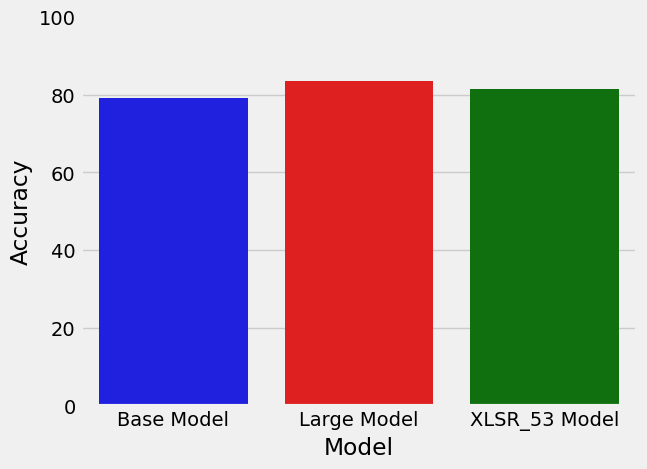

Base Model Accuracy: 79.12087912087912
Large Model Accuracy: 83.51648351648352
XLSR_53 Model Accuracy: 81.31868131868131
Total Words Spoken: 91


In [13]:
base_accuracy = (base_correct / total_words) * 100
large_accuracy = (large_correct / total_words) * 100
XLSR_53_accuracy = (XLSR_53_correct / total_words) * 100

models = ['Base Model', 'Large Model', 'XLSR_53 Model']
accuracies = [base_accuracy, large_accuracy, XLSR_53_accuracy]

plt.style.use('fivethirtyeight')
sns.barplot(x = models, y = accuracies, palette = ['blue', 'red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.show()

print(f'Base Model Accuracy: {base_accuracy}')
print(f'Large Model Accuracy: {large_accuracy}')
print(f'XLSR_53 Model Accuracy: {XLSR_53_accuracy}')
print(f'Total Words Spoken: {total_words}')